In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import os
from scipy.optimize import curve_fit
#from sklearn.metrics import r2_score, mean_squared_error

plt.rcParams["figure.figsize"] = (20, 10)


def get_period(data):
    # Assuming 'data' is your np array
    peaks, _ = find_peaks(data)

    # Check for at least 2 peaks to compute a period
    return (peaks[-1] - peaks[0]) / (len(peaks) - 1)


def moving_avg(arr, window_size):
    num_values = len(arr) - window_size + 1

    # Create an empty array to store the moving average values
    avg = np.empty(num_values)

    # Compute the forward moving average
    for i in range(num_values):
        avg[i] = np.mean(arr[i : i + window_size])

    return avg

/mnt/c/Users/chen9/OneDrive/桌面/NLSE/M=10
0.025
0.025: 0.016936048723640542


IndexError: list index out of range

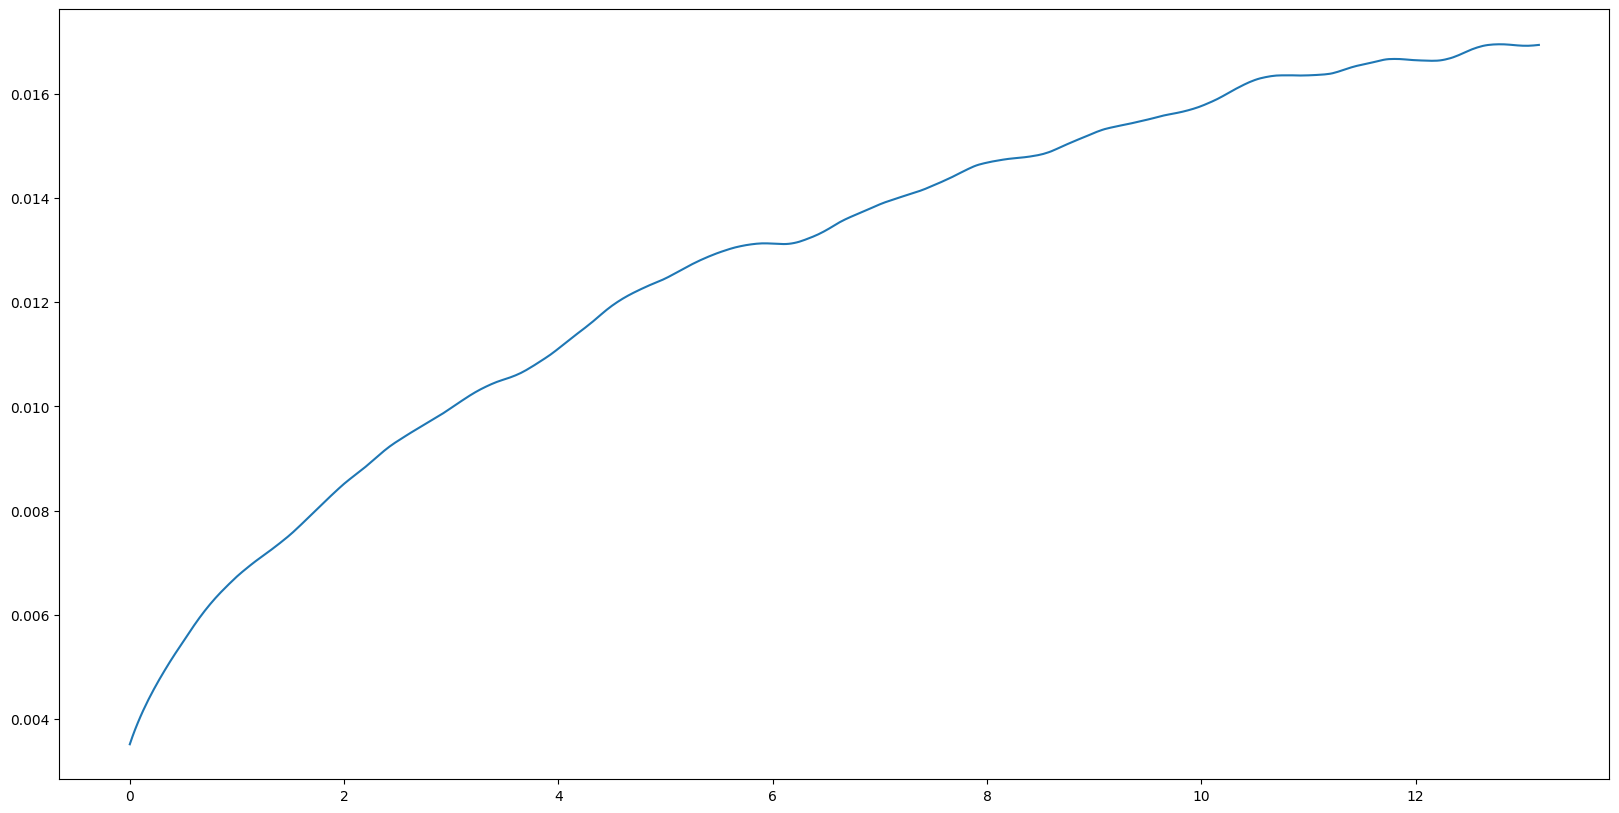

In [23]:
folder_name = "M=10"  
directory = os.path.join(os.getcwd(), folder_name)
print(directory)
# directory.sort()

t_list = np.arange(0.01, 0.095, 0.01)
t_list = np.flip(t_list)
t_list = [0.025]
index = 0
lgd = []
error_at_t50 = []

# Iterate over all files in the directory
for filename in sorted(os.listdir(directory), reverse=True):
    if filename.endswith(".npy"):
        if "f" in filename:

            delta_t = round(t_list[index],3)
            print(delta_t)
            arr = np.load(os.path.join(directory, filename))
            # plt.plot(arr)
            # plt.show()
            # plt.plot(np.arange(0,delta_t*len(arr),delta_t)[:1000],arr[:1000])

            # get MAE
            period = get_period(arr) * delta_t
            avg = moving_avg(arr, int(period / delta_t))
            for i in range(2):
                avg = moving_avg(avg, int(get_period(avg)))

            x_val = np.arange(0, delta_t * len(avg), delta_t) # time
            y_val = avg
            error_at_t50.append(y_val[-1])
            print(str(delta_t) + ": " + str(y_val[-1])) # error at t=50

            max_len = min(len(x_val), len(y_val))
            plt.plot(x_val[:max_len], y_val[:max_len])
            xy = np.array([x_val[:max_len], y_val[:max_len]])
            np.save(os.path.join(directory,str(delta_t) + ".npy"), xy)
            index += 1
            lgd.append(r"$\Delta t$=" + str(delta_t))

error_at_t50.reverse()
#np.save(os.path.join(directory,"error at t=50.npy"), error_at_t50)
plt.xlabel("time")
plt.ylabel("Moving Average of MAE")
plt.legend(lgd)
plt.savefig(os.path.join(directory,'error vs t.png'))
plt.show()

0/1
(2001,)


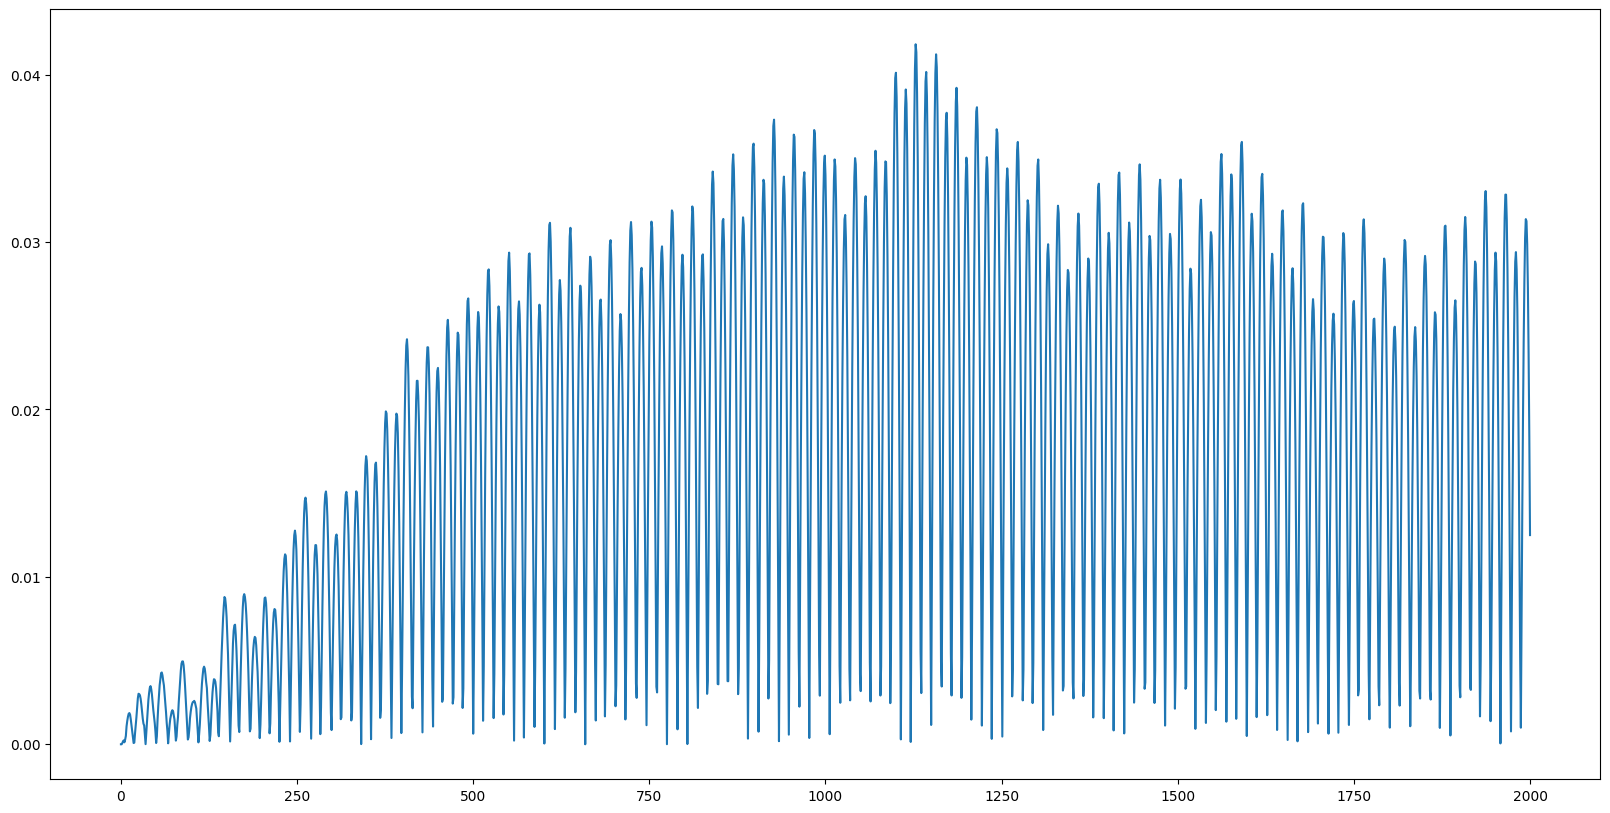

In [25]:
from parallel import *

plt.plot(optimized_L1(50,0.025,1,10))
plt.plot(optimized_L1(50,0.04,1,16))
plt.legend(['10,16'])